In [2]:
pip install ucimlrepo

Acurácia: 0.9166666666666666
Precisão: 0.9361111111111112
Revocação: 0.875
F1-Score: 0.8893604479811376

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



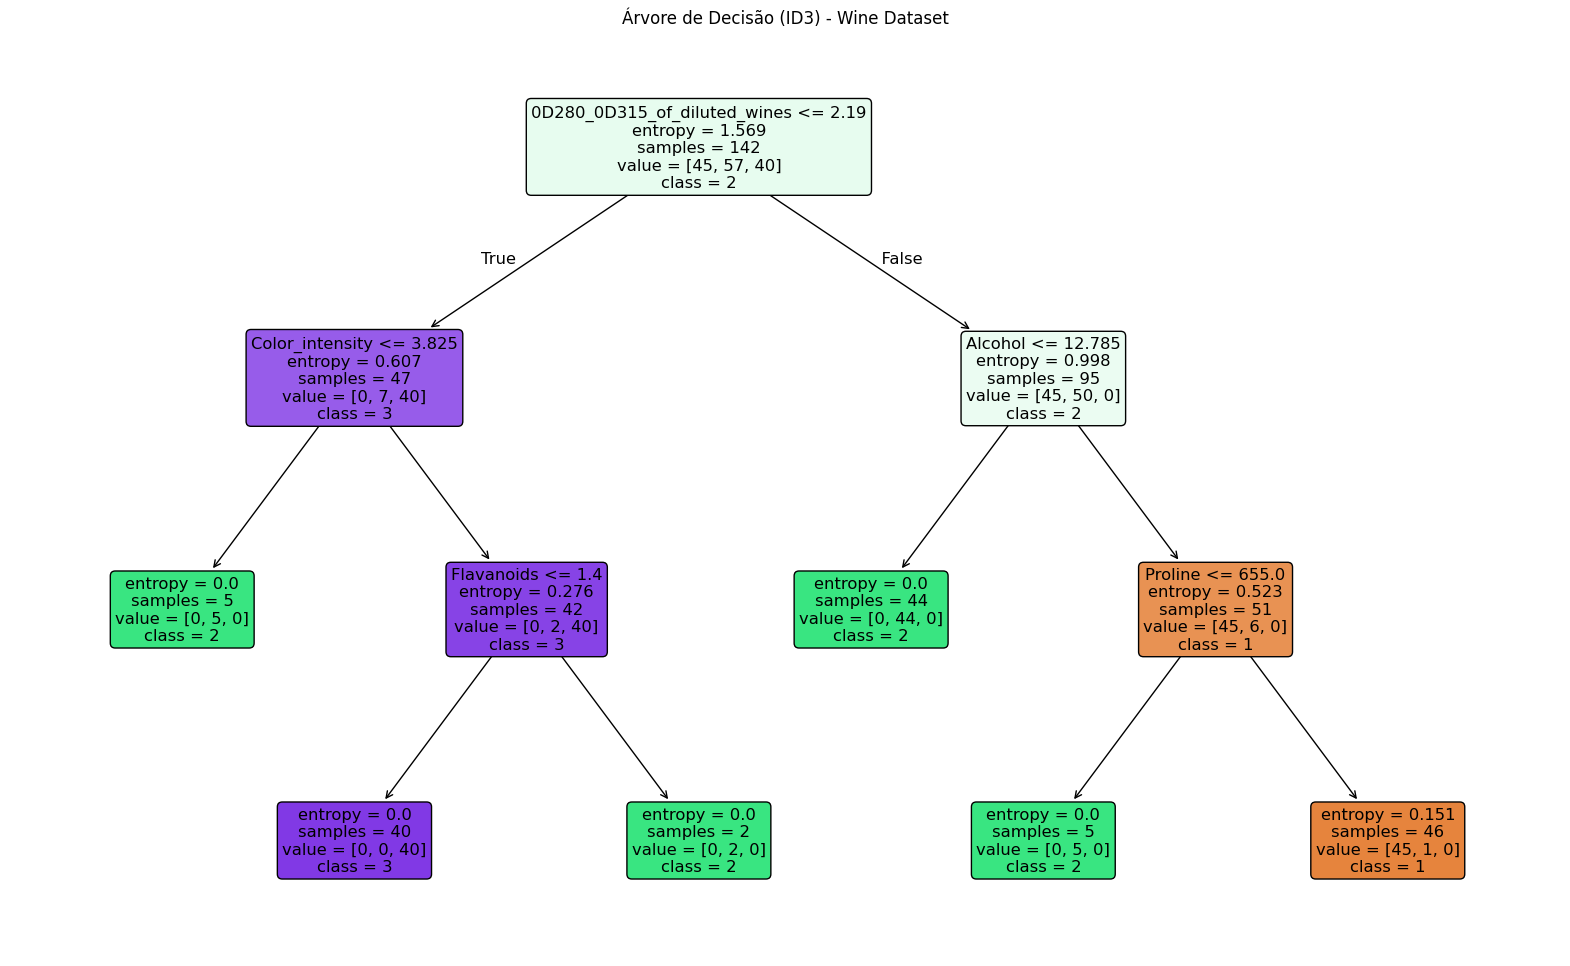

In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Carregar a base Wine
wine = fetch_ucirepo(id=109)

# 2. Separar dados (X) e rótulos (y)
X = wine.data.features
y = wine.data.targets

# 3. Codificar os rótulos se forem categóricos (texto)
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())  # Transforma as classes (1, 2, 3) em (0, 1, 2)

# 4. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Criar e treinar o classificador com entropia (ID3) e profundidade limitada
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred, average='macro'))
print("Revocação:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Relatório por classe
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# 8. Visualizar a árvore de decisão
plt.figure(figsize=(20, 12))
tree.plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=[str(c) for c in le.classes_],  # Usa as classes originais do LabelEncoder
    filled=True,
    rounded=True
)
plt.title("Árvore de Decisão (ID3) - Wine Dataset")
plt.show()

In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Carregar a base Wine
wine = fetch_ucirepo(id=109)

# 2. Separar dados (X) e rótulos (y)
X = wine.data.features
y = wine.data.targets

# 3. Codificar os rótulos se forem categóricos
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())

# 4. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Criar o modelo Naive Bayes
modelo = GaussianNB()

# 6. Treinar o modelo
modelo.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = modelo.predict(X_test)

# 8. Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



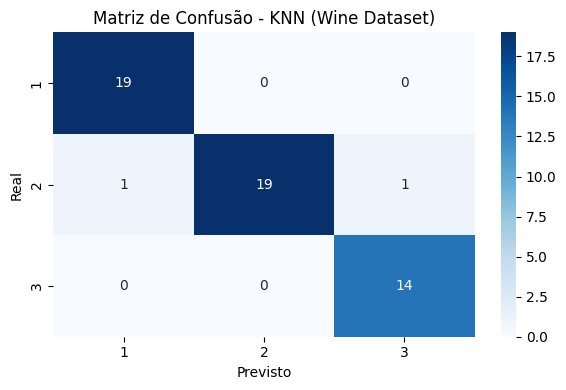

In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar a base Wine
wine = fetch_ucirepo(id=109)

# 2. Separar dados (X) e rótulos (y)
X = wine.data.features
y = wine.data.targets

# 3. Codificar os rótulos
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())

# 4. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Padronizar os dados (KNN é sensível a escala)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Criar o modelo KNN (com 3 vizinhos)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Corrected 'y_tarain' to 'y_train'

# 7. Fazer previsões
y_pred = knn.predict(X_test)

# 8. Avaliar o modelo
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

# 9. Exibir a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=[str(c) for c in le.classes_], yticklabels=[str(c) for c in le.classes_])
plt.title('Matriz de Confusão - KNN (Wine Dataset)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()